In [ ]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

%matplotlib inline

votes_file = '../assets/datasets/votes.csv'
airport_file = '../assets/datasets/Airport_operations.csv'

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [ ]:
votes = pd.read_csv(votes_file)

In [ ]:
votes.columns

In [ ]:
votes.shape

In [ ]:
votes.head()
votes.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
#votes = votes.iloc[:, 1:]
#votes.head(2)

In [ ]:
Y = [1 if x == 'democrat' else 0 for x in votes.Class.values]
print Y[0:10]

In [ ]:
Xvote = votes.iloc[:, 1:]
Xvote.head(5)

In [ ]:
Xvote.isnull().sum()

In [ ]:
print 'Rows lost:', Xvote.shape[0] - Xvote.dropna().shape[0]
print 'Data points removing rows:', (Xvote.shape[0] - Xvote.dropna().shape[0])*Xvote.shape[1]
print 'Orignal valid data points:', Xvote.shape[0]*Xvote.shape[1] - Xvote.isnull().sum().sum()
print 'INvalid to fill in:', Xvote.isnull().sum().sum()

In [ ]:
def change_yn_to_binary(x):
    if x == 'y':
        return 1
    elif x == 'n':
        return 0
    else:
        return x

# fill in the missing values with random 1 or 0:

# iterate through the columns
for c in Xvote.columns:
    
    Xvote.loc[:, c] = Xvote[c].map(change_yn_to_binary)
    
    # make a mask of rows for this column where the value is null/nan
    mask = Xvote[c].isnull()
    # for those rows at this column, put in random 1s or 0s the size of the number
    # of missing values
    Xvote.loc[mask, c] = np.random.choice(2, size=np.sum(mask))
    
Xvote.isnull().sum()    

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [ ]:
Xvote = Xvote.iloc[:, 1:]
Xn = (Xvote - Xvote.mean()) / Xvote.std()
Xn_corr = Xn.cov()
Xn_corr

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Xn_corr.values)

Now, let's check the eigenvalues: 

In [ ]:
eigenvalues

And the eigenvectors: 

In [ ]:
print eigenvectors[0:2]
print len(eigenvectors[0])

To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

In [ ]:
eigen_pairs = [[e_value, e_vector] for e_value, e_vector in zip(eigenvalues, eigenvectors)]
eigen_pairs = sorted(eigen_pairs, reverse=True)

In [ ]:
[e[0] for e in eigen_pairs]

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

In [ ]:
total_variance = np.sum(eigenvalues)
explained_variance = [(e[0]/total_variance)*100 for e in eigen_pairs]
explained_variance

In [ ]:
print Xvote.shape

In [20]:
tmp = pd.DataFrame({'vote':Xvote.iloc[0,:].values,
                    'eigenvector':eigenvectors[0],
                    'PC1_pre_sum':Xvote.iloc[0,:].values*eigenvectors[0]})
tmp

,PC1_pre_sum,eigenvector,vote
0,-0.000000,-0.188827,0.0
1,-0.177455,-0.177455,1.0
2,-0.000000,-0.116754,0.0
3,-0.058499,-0.058499,1.0
4,0.644533,0.644533,1.0
5,0.512883,0.512883,1.0
6,0.000000,0.033529,0.0
7,0.000000,0.033349,0.0
8,-0.000000,-0.113188,0.0
9,0.078246,0.078246,1.0


In [21]:
tmp.PC1_pre_sum.sum()

1.06637086491139

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [29]:
eigenPairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

7.09342689234
1.36461129879
1.13853379882
0.878173266863
0.861819079635
0.810306347248
0.595850543826
0.540985646561
0.51308682768
0.461104617282
0.413578969683
0.368857671899
0.311863148712
0.267031487261
0.237988641873
0.142781761527


Now, calculate the explained variance and the Cumulative explained variance

In [32]:
totalEigen = sum(eigenvalues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenvalues, reverse=True)]
print varExpl

[44.333918077117033, 8.5288206174467582, 7.1158362426322075, 5.4885829178943446, 5.3863692477194745, 5.0644146702982491, 3.7240658989133832, 3.3811602910059184, 3.2067926729974627, 2.8819038580112104, 2.5848685605159014, 2.3053604493688087, 1.9491446794531044, 1.6689467953805528, 1.4874290117039868, 0.89238600954162461]


In [33]:
cvarex = np.cumsum(varExpl)

In [34]:
print(cvarex)

[ 44.33391808  52.86273869  59.97857494  65.46715786  70.8535271
  75.91794177  79.64200767  83.02316796  86.22996064  89.11186449
  91.69673305  94.0020935   95.95123818  97.62018498  99.10761399 100.        ]


Now, conduct a PCA using scikit learn

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [25]:
PCA_set = PCA(n_components=4)
Y = PCA_set.fit_transform(Xvote)

In [28]:
#Xvote.head()

In [29]:
Y

array([[-1.69724218,  0.29331557,  0.78588337, -0.04434567],
       [-1.85982939,  0.3813913 , -0.64627078,  0.00713509],
       [-1.02891072,  1.31851884, -0.01668527,  0.19536568],
       ..., 
       [-1.62673383,  0.07137617, -0.02910684, -0.77263712],
       [-1.0744999 , -0.62470921, -0.45565333, -0.26767338],
       [-1.62443322,  0.00929231, -0.04269742, -0.01413397]])

In [30]:
print PCA_set.n_components
print PCA_set.explained_variance_
x_vals = np.arange(1, PCA_set.n_components)

4
[ 1.74684169  0.34501261  0.27091238  0.20550215]


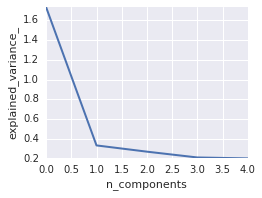

In [62]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(PCA_set.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Case #2: Airport Delays

In [6]:
air = pd.read_csv('../assets/datasets/Airport_operations.csv')

In [8]:
air.head()
air.shape

(841, 15)

First, let's define the x and y variables: Airport is going to be our "x" variable

Then, standardize the x variable for analysis

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

Then, check your eigenvalues and eigenvectors:

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

Next, Calculate the explained variance

Finally, conduct the PCA - use the results about to guide your selection of "n" componants